### Importando os Dados

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sb

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

### Importando e entendendo os dados

In [4]:
df = pd.read_csv('pulsar_stars.csv')
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


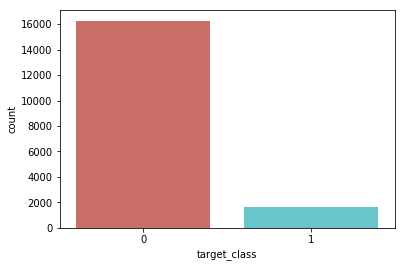

In [5]:
# Target é binário?
sb.countplot(x='target_class',data=df, palette='hls')

Dados da variável target são binários, mas bastante desbalanceados, o que pode vir a comprometer a acurácia.

In [6]:
# forma dos dados
df.shape

(17898, 9)

In [7]:
# verificando por NAs
titanic.isna().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

Observamos que **não há valores faltantess**.

### Entendendo variáveis categóricas

In [9]:
# analisando a quantidade de valores únicos por coluna:
df.nunique()

 Mean of the integrated profile                   8626
 Standard deviation of the integrated profile    17862
 Excess kurtosis of the integrated profile       17897
 Skewness of the integrated profile              17898
 Mean of the DM-SNR curve                         9000
 Standard deviation of the DM-SNR curve          17894
 Excess kurtosis of the DM-SNR curve             17895
 Skewness of the DM-SNR curve                    17895
target_class                                         2
dtype: int64

Também podemos observar que aparentemente **não há variáveis categóricas**.

### Segregando os dados em Treino e Teste

In [11]:
# Features
X = df.iloc[:,:-1].values

# Target
y = df.iloc[:,-1].values

# Dados com MinMaxScaler
X = MinMaxScaler().fit_transform(X)

############# Dividindo em Treino e Teste (80~20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42)

In [12]:
# definindo grade de parâmetros a testar
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  
              'gamma': [1000,100, 10, 1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','sigmoid']}

### Treinando o Modelo

In [13]:
# buscando a melhor busca de parâmetros para dados PADRONIZADOS
grid_search = GridSearchCV(SVC(), param_grid, verbose = 8, 
                           cv=5, n_jobs=-1, scoring='f1')
grid_result = grid_search.fit(X_train, y_train) 

Fitting 5 folds for each of 112 candidates, totalling 560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   59.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 537 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 560 out of 560 | elapsed:  5.4min finished


In [14]:
# imprimindo o resultado
grid_search.best_score_

0.8824257720413261

In [15]:
bestSVM = grid_search.best_estimator_
y_pred = bestSVM.predict(X_test)

In [16]:
# imprimindo o relatório de resultados
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3259
           1       0.94      0.83      0.88       321

    accuracy                           0.98      3580
   macro avg       0.96      0.91      0.93      3580
weighted avg       0.98      0.98      0.98      3580



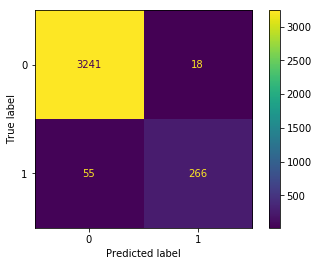

In [18]:
# imprimindo a matriz de confusão
plot_confusion_matrix(bestSVM, X_test, y_test)

Dado o desbalanceamento dos dados, optamos pelo GridSearch buscando a otimização da métrica **F1**. Desta forma, obtivemos o **F1 geral de 0,98, com o valor da classe 1 em 0,88**.

Os parâmetros do modelo que levam à melhor acurácia são:

In [19]:
grid_search.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}